In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_data.csv to covid_19_data.csv


In [3]:
covid = pd.read_csv("covid_19_data.csv")
covid.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [7]:
print("Size/Shape of the dataset",covid.shape)
print("Checking for null values",covid.isnull().sum())
print("Checking Data-type",covid.dtypes)

Size/Shape of the dataset (281487, 7)
Checking for null values ObservationDate        0
Province/State     72134
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
Checking Data-type ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [8]:
#Dropping the column
covid.drop(["SNo"],1,inplace=True)

KeyError: ignored

In [9]:
covid.isnull().sum()

ObservationDate        0
Province/State     72134
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [11]:
covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])

In [12]:
#Grouping differnent types of cases as per the date
datewise = covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})


In [13]:
print("Basic Information")
print("Total number of Confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of Death cases around the world",datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the world",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed cases around the world",(datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))


Basic Information
Total number of Confirmed cases around the world 148355390.0
Total number of Recovered cases around the world 85985343.0
Total number of Death cases around the world 3131660.0
Total number of Active cases around the world 59238387.0
Total number of Closed cases around the world 89117003.0


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

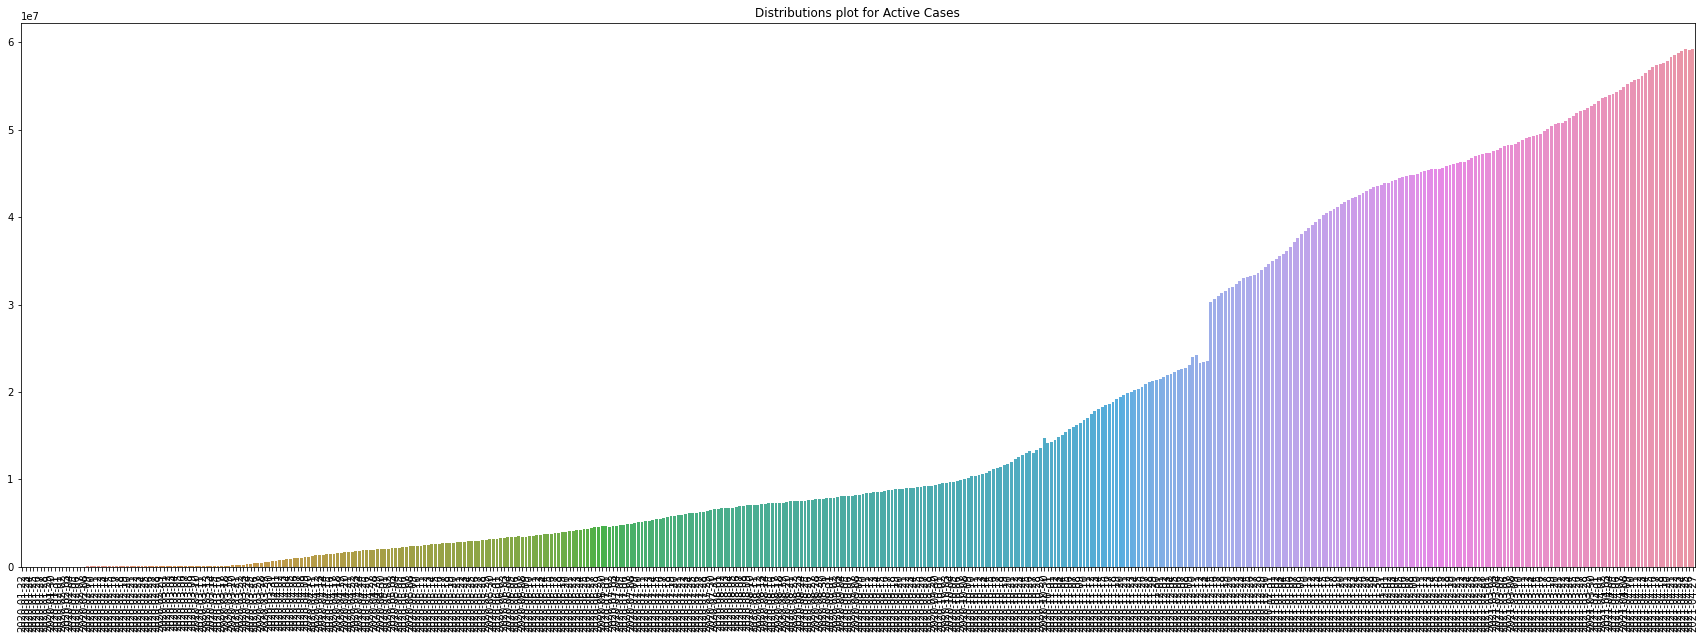

In [14]:
plt.figure(figsize=(30,10))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distributions plot for Active Cases")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

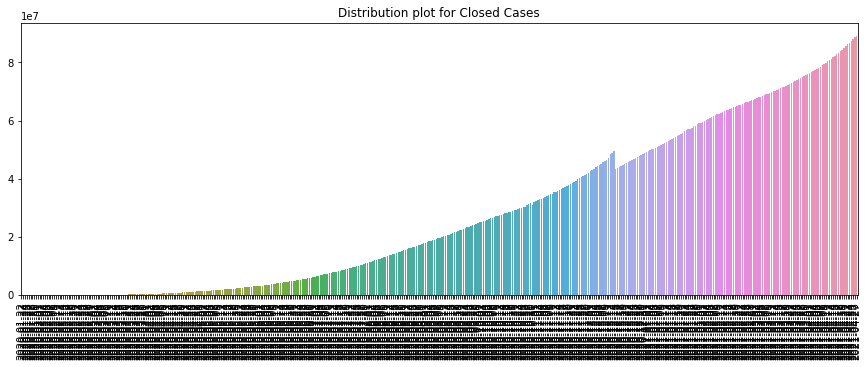

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distribution plot for Closed Cases")
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Weekly Progress of different types of cases')

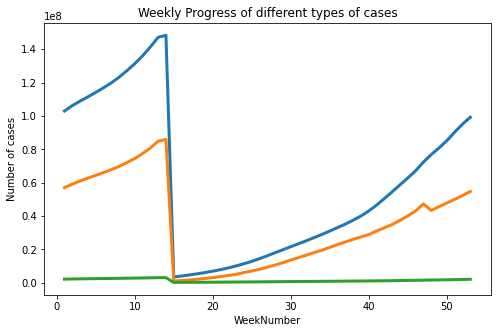

In [16]:
datewise["WeekofYear"] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth =3)
plt.plot(week_num,weekwise_deaths,linewidth = 3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

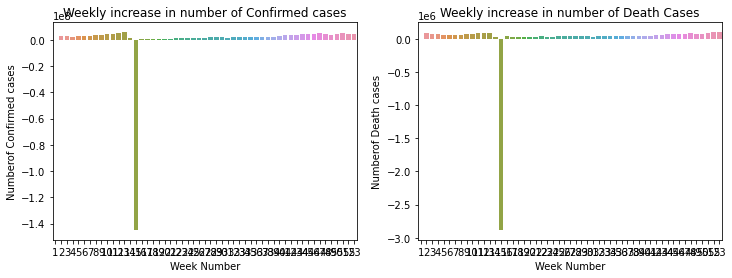

In [17]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x= week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x= week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Numberof Confirmed cases")
ax2.set_ylabel("Numberof Death cases")
ax1.set_title("Weekly increase in number of Confirmed cases")
ax2.set_title("Weekly increase in number of Death Cases")
plt.show()

Average increase in number of Confirmed cases everyday: 321114.0
Average increase in number of Recovered cases everyday: 186115.0
Average increase in number of Death cases everyday: 6778.0


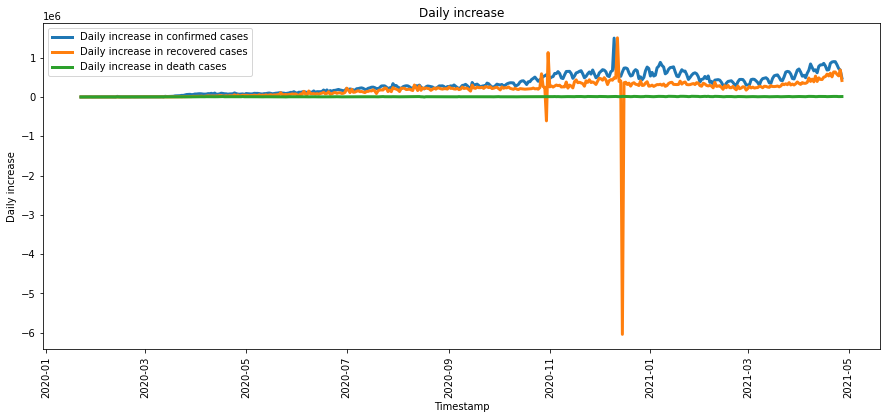

In [18]:
print("Average increase in number of Confirmed cases everyday:",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everyday:",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Death cases everyday:",np.round(datewise["Deaths"].diff().fillna(0).mean()))

plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [19]:
#Country wise analysis
#Calculating Country wise Mortality rate
countrywise= covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Recovered"])*100
countrywise["Recovered"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

Text(0.5, 1.0, 'Top 15 countries as per number of death cases')

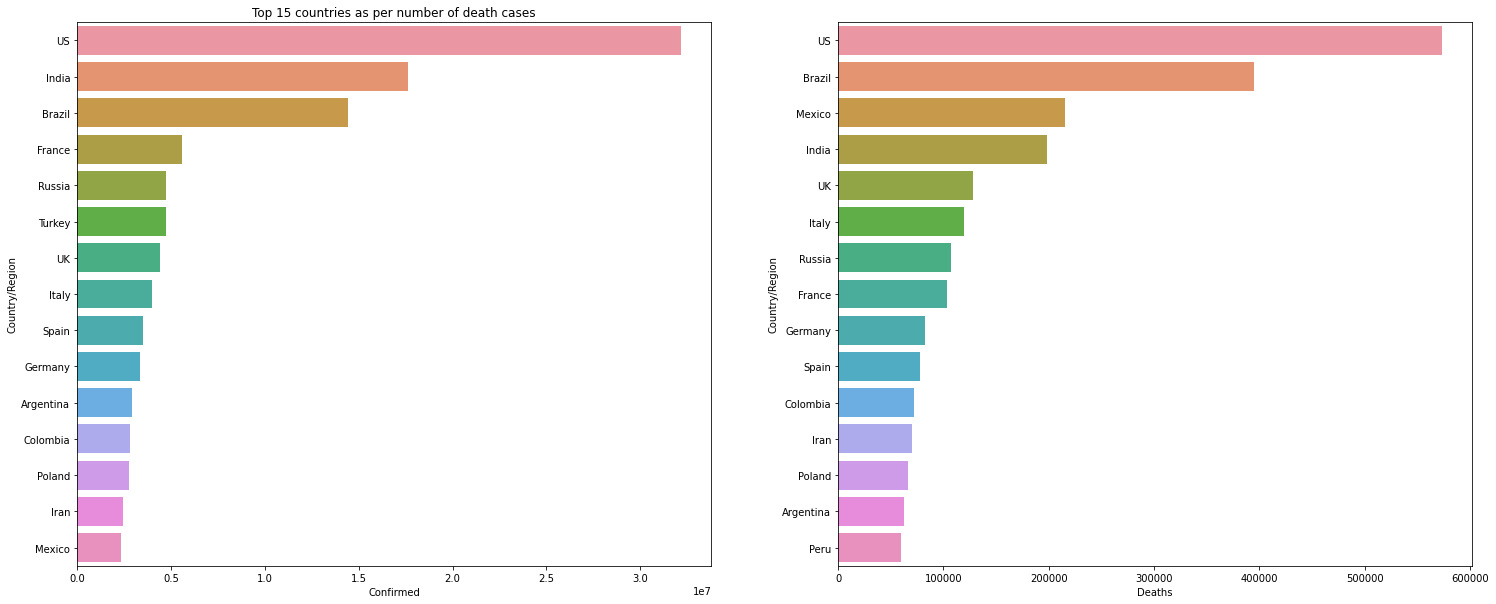

In [20]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_15confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per number of confirmed cases")
sns.barplot(x=top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax1.set_title("Top 15 countries as per number of death cases")

In [21]:
#Data Anlaysis for India
india_data = covid[covid["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Active Cases",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed    17636307.0
Recovered    14556209.0
Deaths         197894.0
Name: 2021-04-27 00:00:00, dtype: float64
Total Active Cases 2882204.0
Total Closed Cases 14754103.0


In [22]:
#Data Anlaysis for US
us_data = covid[covid["Country/Region"]=="US"]
datewise_us = us_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_us.iloc[-1])
print("Total Active Cases",datewise_us["Confirmed"].iloc[-1]-datewise_us["Recovered"].iloc[-1]-datewise_us["Deaths"].iloc[-1])
print("Total Closed Cases",datewise_us["Recovered"].iloc[-1]+datewise_us["Deaths"].iloc[-1])

Confirmed    32175049.0
Recovered           0.0
Deaths         573378.0
Name: 2021-04-27 00:00:00, dtype: float64
Total Active Cases 31601671.0
Total Closed Cases 573378.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Weekly Progress of different types of cases')

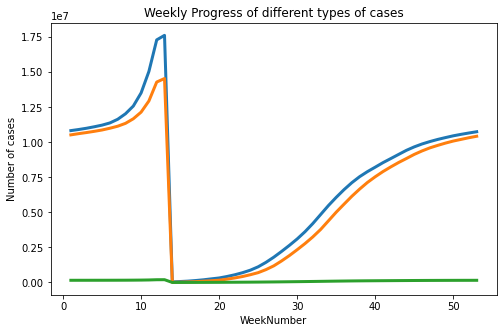

In [23]:
datewise_india["WeekofYear"] = datewise_india.index.weekofyear
week_num_india = []
india_weekwise_confirmed = []
india_weekwise_recovered = []
india_weekwise_deaths = []
w = 1
for i in list(datewise_india["WeekofYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3)
plt.plot(week_num_india,india_weekwise_recovered,linewidth =3)
plt.plot(week_num_india,india_weekwise_deaths,linewidth = 3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

In [24]:
max_ind = datewise_india["Confirmed"].max()
china_data = covid[covid["Country/Region"]=="Mainland China"]
Italy_data = covid[covid["Country/Region"]=="Italy"]
US_data = covid[covid["Country/Region"]=="US"]
spain_data = covid[covid["Country/Region"]=="Spain"]
datewise_china = china_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_US=US_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Spain=spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("It took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach",max_ind,"Confirmed Cases")
print("It took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach number of Confirmed Cases")
print("It took",datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in US to reach number of Confirmed Cases")
print("It took",datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)].shape[0],"days in Spain to reach number of Confirmed Cases")
print("It took",datewise_china[(datewise_china["Confirmed"]>0)&(datewise_china["Confirmed"]<=max_ind)].shape[0],"days in China to reach number of Confirmed Cases")

It took 454 days in India to reach 17636307.0 Confirmed Cases
It took 453 days in Italy to reach number of Confirmed Cases
It took 332 days in US to reach number of Confirmed Cases
It took 452 days in Spain to reach number of Confirmed Cases
It took 462 days in China to reach number of Confirmed Cases


In [25]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml = datewise.iloc[:int(datewise.shape[0]*0.95):]
model_scores=[]

In [26]:
train_ml

,Confirmed,Recovered,Deaths,WeekofYear,Days Since
ObservationDate,,,,,
2020-01-22,557.0,30.0,17.0,4,0
2020-01-23,1097.0,60.0,34.0,4,1
2020-01-24,941.0,39.0,26.0,4,2
2020-01-25,1437.0,42.0,42.0,4,3
2020-01-26,2118.0,56.0,56.0,4,4
...,...,...,...,...,...
2021-03-30,128214491.0,72736786.0,2803782.0,13,433
2021-03-31,128897696.0,73119295.0,2816055.0,13,434
2021-04-01,129609483.0,73464081.0,2827923.0,13,435


In [27]:
lin_reg = LinearRegression(normalize=True)
svm = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [28]:
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [29]:
prediction_valid_lin_reg

array([[-2.73877650e+07],
       [-2.70768997e+07],
       [-2.67660345e+07],
       [-2.64551692e+07],
       [-2.61443040e+07],
       [-2.58334387e+07],
       [-2.55225734e+07],
       [-2.52117082e+07],
       [-2.49008429e+07],
       [-2.45899777e+07],
       [-2.42791124e+07],
       [-2.39682471e+07],
       [-2.36573819e+07],
       [-2.33465166e+07],
       [-2.30356514e+07],
       [-2.27247861e+07],
       [-2.24139209e+07],
       [-2.21030556e+07],
       [-2.17921903e+07],
       [-2.14813251e+07],
       [-2.11704598e+07],
       [-2.08595946e+07],
       [-2.05487293e+07],
       [-2.02378640e+07],
       [-1.99269988e+07],
       [-1.96161335e+07],
       [-1.93052683e+07],
       [-1.89944030e+07],
       [-1.86835378e+07],
       [-1.83726725e+07],
       [-1.80618072e+07],
       [-1.77509420e+07],
       [-1.74400767e+07],
       [-1.71292115e+07],
       [-1.68183462e+07],
       [-1.65074809e+07],
       [-1.61966157e+07],
       [-1.58857504e+07],
       [-1.5

In [30]:
new_date = []
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
  new_date.append(datewise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVR"])
model_predictions.head(5)

,Dates,LR,SVR
0,2021-04-28,116231984,46918701
1,2021-04-29,116542850,47166795
2,2021-04-30,116853715,47417041
3,2021-05-01,117164580,47669455
4,2021-05-02,117475445,47924049


In [31]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.85)]
valid=datewise.iloc[int(datewise.shape[0]*0.85):]

In [32]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))

In [33]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
   holt_new_date.append(datewise.index[-1]+timedelta(days=i))
   holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holts Linear Model Prediction"]=holt_new_prediction
model_predictions.head()

,Dates,LR,SVR,Holts Linear Model Prediction
0,2021-04-28,116231984,46918701,136084775
1,2021-04-29,116542850,47166795,136458083
2,2021-04-30,116853715,47417041,136831391
3,2021-05-01,117164580,47669455,137204699
4,2021-05-02,117475445,47924049,137578007


No handles with labels found to put in legend.


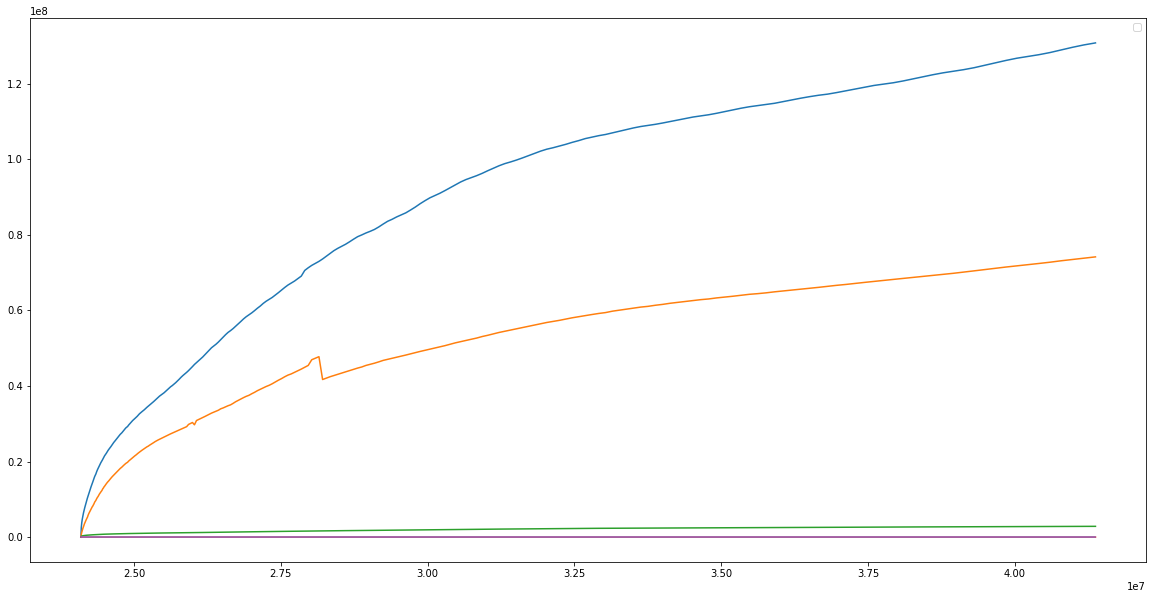

In [34]:

plt.figure(figsize=(20,10))
plt.plot(prediction_valid_svm, valid_ml)
plt.legend()

No handles with labels found to put in legend.


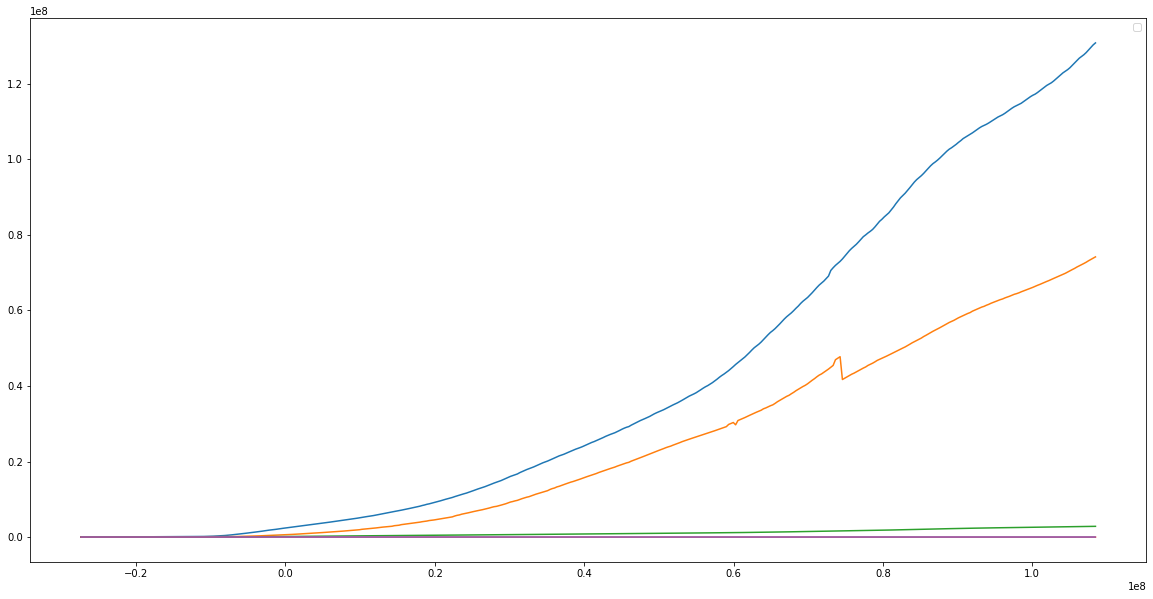

In [35]:

plt.figure(figsize=(20,10))
plt.plot(prediction_valid_lin_reg, valid_ml)
plt.legend()